# Numpy and Pandas

## Objectives: 

- Use numpy.random to generate a dataset.
- Read in various forms of data into a panadas dataframe
- Perform some basic operations on the dataframe 

## Agenda

- Review Numpy
- Introduce Pandas
- Reading in data and merging dataframes (DF)
- working with missing values
- Slicing, selecing and extracting data

## Numpy

- There is nothing in NumPy which can’t be done via python lists or by using other data structures.
- NumPy provides an efficient storage and better way handling of the data for mathematical operations using simple API’s.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [2]:
# Create an array of 25 numbers between -1 and 1 that are equally spaced
pure = np.linspace(-1, 1, 25)

In [5]:
pure

array([-1.        , -0.91666667, -0.83333333, -0.75      , -0.66666667,
       -0.58333333, -0.5       , -0.41666667, -0.33333333, -0.25      ,
       -0.16666667, -0.08333333,  0.        ,  0.08333333,  0.16666667,
        0.25      ,  0.33333333,  0.41666667,  0.5       ,  0.58333333,
        0.66666667,  0.75      ,  0.83333333,  0.91666667,  1.        ])

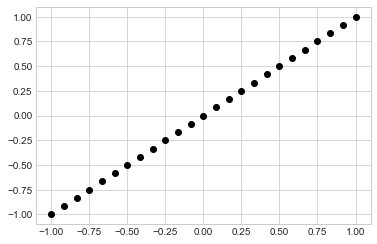

In [6]:
# Create a scatterplot where the x and y both refer to the array created above
plt.plot(pure, pure, 'o', color='black');


In [8]:
pure.shape
#type = tuple

(25,)

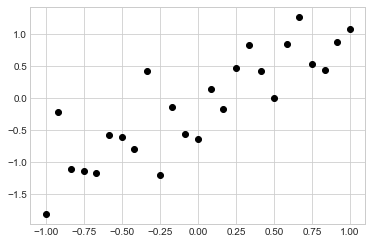

In [9]:
#Add some noise to the data by randomly generating numbers between 0 and .5 to add to the Ys
#random - the first value is the mean, second is the scale or std
noise = np.random.normal(0, .5, pure.shape, )
signal = pure + noise
plt.plot(pure, signal, 'o', color='black');


In [10]:
# Graph a log transformation of the numbers
np.random.seed(1234)
pure = np.linspace(0, 10000, 50)
noise = np.random.normal(-.2, .2, pure.shape)
y = np.log(pure)
signal = y + noise

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [12]:
y

array([      -inf, 5.31852007, 6.01166725, 6.41713236, 6.70481443,
       6.92795799, 7.11027954, 7.26443022, 7.39796162, 7.51574465,
       7.62110517, 7.71641535, 7.80342672, 7.88346943, 7.9575774 ,
       8.02657027, 8.0911088 , 8.15173342, 8.20889183, 8.26295905,
       8.31425235, 8.36304251, 8.40956253, 8.45401429, 8.4965739 ,
       8.5373959 , 8.57661661, 8.61435694, 8.65072458, 8.6858159 ,
       8.71971746, 8.75250728, 8.78425598, 8.81502764, 8.8448806 ,
       8.87386814, 8.90203901, 8.92943799, 8.95610623, 8.98208172,
       9.00739953, 9.03209214, 9.05618969, 9.07972019, 9.10270971,
       9.12518256, 9.14716147, 9.16866768, 9.18972108, 9.21034037])

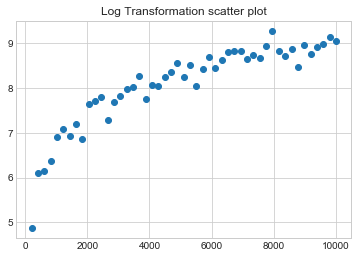

In [8]:
# Create plot
fig, ax = plt.subplots()
ax.scatter(pure, signal)
ax.set_title('Log Transformation scatter plot')

plt.show()

**Use a numpy function to transform the `pure` data series and then create your own scatterplot of the new data with the `pure` data.**


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


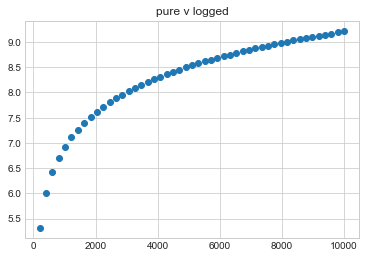

In [13]:
# Create plot
fig, ax = plt.subplots()

#transform your data with a numpy function
logged_pure = np.log(pure)

#plot the newly retransformed graph
ax.scatter(pure, logged_pure)

#rename your grpah
ax.set_title('pure v logged')

plt.show()


## Pandas 

In [14]:
import pandas as pd

### Core components of pandas: Series and DataFrames

The primary two components of pandas are the `Series` and `DataFrame`.

A Series is essentially a column, and a DataFrame is a multi-dimensional table made up of a collection of Series.

<img src="series-and-dataframe.png" alt="drawing" width="600"/>


## Converting Lists to a Series

In [16]:
my_list = [1,2,3,4,5]
my_numpy_array = np.array(my_list)

In [ ]:
help(pd.)

In [19]:
my_list_ser = pd.Series([1,2,3,4,5])

In [20]:
my_list_ser

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [23]:
my_numpy_array_ser = pd.Series(my_numpy_array)

In [24]:
my_numpy_array_ser

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [21]:
help(pd.DataFrame)

Help on class DataFrame in module pandas.core.frame:

class DataFrame(pandas.core.generic.NDFrame)
 |  Two-dimensional size-mutable, potentially heterogeneous tabular data
 |  structure with labeled axes (rows and columns). Arithmetic operations
 |  align on both row and column labels. Can be thought of as a dict-like
 |  container for Series objects. The primary pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects
 |  
 |      .. versionchanged :: 0.23.0
 |         If data is a dict, column order follows insertion-order for
 |         Python 3.6 and later.
 |  
 |      .. versionchanged :: 0.25.0
 |         If data is a list of dicts, column order follows insertion-order
 |         Python 3.6 and later.
 |  
 |  index : Index or array-like
 |      Index to use for resulting frame. Will default to RangeIndex if
 |      no indexing in

## Creating a Dataframe

A dataframe can be created from many different types of data sources.  Below are different examples of this.  

You can convert a series to a DF for easier viewing. 



In [25]:
pd.DataFrame(my_numpy_array_ser)

,0
0,1
1,2
2,3
3,4
4,5


## Converting different data structures  to DataFrames

### You can use a dict

In [26]:
my_dict = {'my_column_name': ['my', 'column', 'elements', 'go', 'here']}

In [27]:
my_dict_df = pd.DataFrame(my_dict)

In [28]:
my_dict_df

,my_column_name
0,my
1,column
2,elements
3,go
4,here


In [30]:
# You can also use a list of lists, or an array of arrays
headers = ['my', 'column', 'headers']
list_of_lists = [['col_1_val_1', 'col_2_val_1', 'col_3_val_1'],
               ['col_1_val_2', 'col_2_val_2', 'col_3_val_2'],
               ['col_1_val_3', 'col_2_val_3', 'col_3_val_3']]

In [31]:
g = pd.DataFrame(list_of_lists, columns = headers)

,my,column,headers
0,col_1_val_1,col_2_val_1,col_3_val_1
1,col_1_val_2,col_2_val_2,col_3_val_2
2,col_1_val_3,col_2_val_3,col_3_val_3


In [32]:
g.columns

NameError: name 'g' is not defined

### Create a dataframe from a csv file

In [34]:
movies = pd.read_csv('IMDB-Movie-Data.csv')
movies.head(9)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0


### Read CSV from weburl

*If you are doing this from git, make sure you have the url for the raw csv file*

In [35]:
#best to remane this as a variable
pd.read_csv('https://raw.githubusercontent.com/learn-co-students/nyc-mhtn-ds-071519-lectures/master/week-1/Descriptive_Statistics/weight-height.csv')

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


### Read in excel file

There is a file called `1617FedSchoolCodeList.xlsx` in this directory.Look up how to read an excel file into a dataframe and do it. 

In [42]:
pd.read_excel('1617FedSchoolCodeList.xlsx', index_col='ID')

,SchoolCode,SchoolName,Address,City,StateCode,ZipCode,Province,Country,PostalCode
ID,,,,,,,,,
25969,B04724,WIDENER UNIV SCHOOL OF LAW - DE,4601 CONCORD PIKE/PO BOX 7474,WILMINGTON,DE,19803,NaN,NaN,NaN
25970,B06171,CENTER FOR ADVANCED STUDIES OF PUER,BOX S-4467,SAN JUAN,PR,902,NaN,NaN,NaN
25971,B06511,PENTECOSTAL THEOLOGICAL SEMINARY,PO BOX 3330,CLEVELAND,TN,37320,NaN,NaN,NaN
25972,B07022,THE CHICAGO SCHOOL OF PROF PSYCHOLOGY,325 NORTH WELLS STREET,CHICAGO,IL,60610,NaN,NaN,NaN
25973,B07624,NATIONAL COLLEGE OF NATURAL MEDICINE,049 SW PORTER,PORTLAND,OR,97201,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32926,E40436,FLORIDA CAREER COLLEGE - UEI COLLEGE - H,70-A FARM TO MARKET ROAD 1960 WEST,HOUSTON,TX,77090,NaN,NaN,NaN
32927,042496,WESTCLIFF UNIVERSITY,4199 CAMPUS DRIVE #650,IRVINE,CA,92612,NaN,NaN,NaN
32928,042534,CLOVIS COMMUNITY COLLEGE,10309 NORTH WILLOW AVENUE,FRESNO,CA,93730,NaN,NaN,NaN


### Create from  from json

In [43]:
import json
db = json.load(open('foods-2011-10-03.json'))
len(db)

6636

In [44]:
pd.DataFrame(db)

,id,description,tags,manufacturer,group,portions,nutrients
0,1008,"Cheese, caraway",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]","[{'value': 25.18, 'units': 'g', 'description':..."
1,1009,"Cheese, cheddar",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'cup, diced', 'grams': ...","[{'value': 24.9, 'units': 'g', 'description': ..."
2,1018,"Cheese, edam",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 4.22, 'units': 'g', 'description': ..."
3,1019,"Cheese, feta",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'cup, crumbled', 'grams...","[{'value': 5.2, 'units': 'g', 'description': '..."
4,1028,"Cheese, mozzarella, part skim milk",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]","[{'value': 3.27, 'units': 'g', 'description': ..."
...,...,...,...,...,...,...,...
6631,42161,"Bologna, beef, low fat",[],,Sausages and Luncheon Meats,"[{'amount': 1, 'unit': 'slice', 'grams': 28.0}...","[{'value': 11.8, 'units': 'g', 'description': ..."
6632,42173,"Turkey and pork sausage, fresh, bulk, patty or...",[],,Sausages and Luncheon Meats,"[{'amount': 1, 'unit': 'cup, cooked', 'grams':...","[{'value': 22.7, 'units': 'g', 'description': ..."
6633,43408,"Babyfood, juice, pear",[],None,Baby Foods,"[{'amount': 1, 'unit': 'fl oz', 'grams': 31.2}...","[{'value': 0.0, 'units': 'g', 'description': '..."
6634,43539,"Babyfood, dessert, banana yogurt, strained",[],None,Baby Foods,"[{'amount': 1, 'unit': 'tbsp', 'grams': 15.0},...","[{'value': 1.1, 'units': 'g', 'description': '..."


In [47]:
db[0]

{'id': 1008,
 'description': 'Cheese, caraway',
 'tags': [],
 'manufacturer': '',
 'group': 'Dairy and Egg Products',
 'portions': [{'amount': 1, 'unit': 'oz', 'grams': 28.35}],
 'nutrients': [{'value': 25.18,
   'units': 'g',
   'description': 'Protein',
   'group': 'Composition'},
  {'value': 29.2,
   'units': 'g',
   'description': 'Total lipid (fat)',
   'group': 'Composition'},
  {'value': 3.06,
   'units': 'g',
   'description': 'Carbohydrate, by difference',
   'group': 'Composition'},
  {'value': 3.28, 'units': 'g', 'description': 'Ash', 'group': 'Other'},
  {'value': 376.0,
   'units': 'kcal',
   'description': 'Energy',
   'group': 'Energy'},
  {'value': 39.28,
   'units': 'g',
   'description': 'Water',
   'group': 'Composition'},
  {'value': 1573.0, 'units': 'kJ', 'description': 'Energy', 'group': 'Energy'},
  {'value': 0.0,
   'units': 'g',
   'description': 'Fiber, total dietary',
   'group': 'Composition'},
  {'value': 673.0,
   'units': 'mg',
   'description': 'Calcium,

In [48]:
pd.read_json('foods-2011-10-03.json')

,id,description,tags,manufacturer,group,portions,nutrients
0,1008,"Cheese, caraway",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]","[{'value': 25.18, 'units': 'g', 'description':..."
1,1009,"Cheese, cheddar",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'cup, diced', 'grams': ...","[{'value': 24.9, 'units': 'g', 'description': ..."
2,1018,"Cheese, edam",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 4.22, 'units': 'g', 'description': ..."
3,1019,"Cheese, feta",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'cup, crumbled', 'grams...","[{'value': 5.2, 'units': 'g', 'description': '..."
4,1028,"Cheese, mozzarella, part skim milk",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]","[{'value': 3.27, 'units': 'g', 'description': ..."
...,...,...,...,...,...,...,...
6631,42161,"Bologna, beef, low fat",[],,Sausages and Luncheon Meats,"[{'amount': 1, 'unit': 'slice', 'grams': 28.0}...","[{'value': 11.8, 'units': 'g', 'description': ..."
6632,42173,"Turkey and pork sausage, fresh, bulk, patty or...",[],,Sausages and Luncheon Meats,"[{'amount': 1, 'unit': 'cup, cooked', 'grams':...","[{'value': 22.7, 'units': 'g', 'description': ..."
6633,43408,"Babyfood, juice, pear",[],None,Baby Foods,"[{'amount': 1, 'unit': 'fl oz', 'grams': 31.2}...","[{'value': 0.0, 'units': 'g', 'description': '..."
6634,43539,"Babyfood, dessert, banana yogurt, strained",[],None,Baby Foods,"[{'amount': 1, 'unit': 'tbsp', 'grams': 15.0},...","[{'value': 1.1, 'units': 'g', 'description': '..."


In [49]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)
info

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
...,...,...,...,...
6631,"Bologna, beef, low fat",Sausages and Luncheon Meats,42161,
6632,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,42173,
6633,"Babyfood, juice, pear",Baby Foods,43408,None
6634,"Babyfood, dessert, banana yogurt, strained",Baby Foods,43539,None


## Familiarizing yourself with the DF

In [50]:
# see the first 5 rows of a DF
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [32]:
# see the last 5 rows of a DF

movies.tail()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [33]:
#look at the columns attribute

print(movies.columns)

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')


In [34]:
#look at the shape attribute
movies.shape

(1000, 12)

In [51]:
#understanding the different types of data for each column
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [52]:
#call on a specific column, can use .head and .tail on series

movies['Actors'].head()

0    Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...
1    Noomi Rapace, Logan Marshall-Green, Michael Fa...
2    James McAvoy, Anya Taylor-Joy, Haley Lu Richar...
3    Matthew McConaughey,Reese Witherspoon, Seth Ma...
4    Will Smith, Jared Leto, Margot Robbie, Viola D...
Name: Actors, dtype: object

In [53]:
movies['Rating'].mean()

6.723199999999999

In [54]:
#get descriptive stats by columns
movies.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


***Why do you think I'm not getting descrpitive statistics for one all of the columns?***

## Application

1. Create a pandas dataframe using the file `macrodata.csv`.
2. Determine how many columns and rows the dataframe has.
3. Generate some descriptive statistics of the different columns. 

In [61]:
# your code here

macrodata = pd.read_csv('macrodata.csv')
macrodata.shape

(203, 14)

In [64]:
macrodata.describe()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,1983.876847,2.492611,7221.171901,4825.293103,1012.863862,663.328640,5310.540887,105.075788,667.927586,5.311773,5.884729,239.724153,3.961330,1.336502
std,14.686817,1.118563,3214.956044,2313.346192,585.102267,140.863655,2423.515977,61.278878,455.346381,2.803071,1.458574,37.390450,3.253216,2.668799
min,1959.000000,1.000000,2710.349000,1707.400000,259.764000,460.400000,1886.900000,28.980000,139.600000,0.120000,3.400000,177.146000,-8.790000,-6.790000
25%,1971.000000,1.500000,4440.103500,2874.100000,519.147500,527.959500,3276.950000,41.050000,228.650000,3.515000,4.900000,208.631000,2.270000,-0.085000
50%,1984.000000,2.000000,6559.594000,4299.900000,896.210000,662.412000,4959.400000,104.100000,540.900000,5.010000,5.700000,236.348000,3.240000,1.340000
75%,1996.500000,3.000000,9629.346500,6398.150000,1436.681500,773.049000,6977.850000,159.650000,1102.100000,6.665000,6.800000,271.721500,4.975000,2.630000
max,2009.000000,4.000000,13415.266000,9363.600000,2264.721000,1044.088000,10077.500000,218.610000,1673.900000,15.330000,10.700000,308.013000,14.620000,10.950000


### Combining Data Frames

In [65]:
#define a ditionary containing employee data
data1 = {'Name':['Jai', 'Princi', 'Gaurav', 'Anuj'], 
        'Age':[27, 24, 22, 32], 
        'Address':['Nagpur', 'Kanpur', 'Allahabad', 'Kannuaj'], 
        'Qualification':['Msc', 'MA', 'MCA', 'Phd'],
        'Mobile No': [97, 91, 58, 76]} 

In [66]:
#Convert the dictionary into DataFrame 
df1 = pd.DataFrame(data1,index=[0, 1, 2, 3])
df1

,Name,Age,Address,Qualification,Mobile No
0,Jai,27,Nagpur,Msc,97
1,Princi,24,Kanpur,MA,91
2,Gaurav,22,Allahabad,MCA,58
3,Anuj,32,Kannuaj,Phd,76


In [67]:
#create a second data frame of employee data to merge the two 
data2 = {'Name':['Gaurav', 'Anuj', 'Dhiraj', 'Hitesh'], 
        'Age':[22, 32, 12, 52], 
        'Address':['Allahabad', 'Kannuaj', 'Allahabad', 'Kannuaj'], 
        'Qualification':['MCA', 'Phd', 'Bcom', 'B.hons'],
        'Salary':[1000, 2000, 3000, 4000]} 

df2 = pd.DataFrame(data2, index=[2, 3, 6, 7]) 
df2.head()

,Name,Age,Address,Qualification,Salary
2,Gaurav,22,Allahabad,MCA,1000
3,Anuj,32,Kannuaj,Phd,2000
6,Dhiraj,12,Allahabad,Bcom,3000
7,Hitesh,52,Kannuaj,B.hons,4000


In [68]:
df1

,Name,Age,Address,Qualification,Mobile No
0,Jai,27,Nagpur,Msc,97
1,Princi,24,Kanpur,MA,91
2,Gaurav,22,Allahabad,MCA,58
3,Anuj,32,Kannuaj,Phd,76


#### Concatenating Dataframes

In [ ]:
# df1.head()
# df2.head()

In [69]:
pd.concat([df1, df2], sort=True, axis=0)
#the first argument from concat is a list
#axis is the row, number pulled from shape

,Address,Age,Mobile No,Name,Qualification,Salary
0,Nagpur,27,97.0,Jai,Msc,NaN
1,Kanpur,24,91.0,Princi,MA,NaN
2,Allahabad,22,58.0,Gaurav,MCA,NaN
3,Kannuaj,32,76.0,Anuj,Phd,NaN
2,Allahabad,22,NaN,Gaurav,MCA,1000.0
3,Kannuaj,32,NaN,Anuj,Phd,2000.0
6,Allahabad,12,NaN,Dhiraj,Bcom,3000.0
7,Kannuaj,52,NaN,Hitesh,B.hons,4000.0


In [ ]:
pd.concat([df1, df2], sort=True, axis=1)

#### Merging Dataframes

<img src="joinimages.png" alt="drawing" width="550"/>


In [89]:
pd.merge(df1, df2,)

,Name,Age,Address,Qualification,Mobile No,Salary
0,Gaurav,22,Allahabad,MCA,58,1000
1,Anuj,32,Kannuaj,Phd,76,2000


In [90]:
help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
    Merge DataFrame or named Series objects with a database-style join.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    
    Parameters
    ----------
    left : DataFrame
    right : DataFrame or named Series
        Object to merge with.
    how : {'left', 'right', 'outer', 'inner'}, default 'inner'
        Type of merge to be performed.
    
        * left: use only keys from left frame, similar to a SQL left outer join;
          preserve key order.
        * right: use only keys from right frame, similar to a SQL right outer join;
          preserve key 

By calling the merge function on multiple dataframes without any specifications, it tries its best to merge them. It will assess any column that they find to be identical and use those as the merge.

In [91]:
pd.merge(df1, df2, how='inner')

,Name,Age,Address,Qualification,Mobile No,Salary
0,Gaurav,22,Allahabad,MCA,58,1000
1,Anuj,32,Kannuaj,Phd,76,2000


If we want to keep all data we should do an outer join

In [92]:
pd.merge(df1, df2, how='outer')

,Name,Age,Address,Qualification,Mobile No,Salary
0,Jai,27,Nagpur,Msc,97.0,NaN
1,Princi,24,Kanpur,MA,91.0,NaN
2,Gaurav,22,Allahabad,MCA,58.0,1000.0
3,Anuj,32,Kannuaj,Phd,76.0,2000.0
4,Dhiraj,12,Allahabad,Bcom,NaN,3000.0
5,Hitesh,52,Kannuaj,B.hons,NaN,4000.0


If you are only concerned with data from one table, then you can specify that table is what you want to merge on.  

In [93]:
pd.merge(df1, df2, how='right')

,Name,Age,Address,Qualification,Mobile No,Salary
0,Gaurav,22,Allahabad,MCA,58.0,1000
1,Anuj,32,Kannuaj,Phd,76.0,2000
2,Dhiraj,12,Allahabad,Bcom,NaN,3000
3,Hitesh,52,Kannuaj,B.hons,NaN,4000


Sometimes you want to be specific in which columns you want the dataframe to merge on

In [94]:
pd.merge(df1, df2, how='right', on=['Name', 'Age'])

,Name,Age,Address_x,Qualification_x,Mobile No,Address_y,Qualification_y,Salary
0,Gaurav,22,Allahabad,MCA,58.0,Allahabad,MCA,1000
1,Anuj,32,Kannuaj,Phd,76.0,Kannuaj,Phd,2000
2,Dhiraj,12,NaN,NaN,NaN,Allahabad,Bcom,3000
3,Hitesh,52,NaN,NaN,NaN,Kannuaj,B.hons,4000


## Data transformation

### Removing duplicates

Duplicate rows may be found in a DataFrame for any number of reasons. Here is an example:


In [95]:
data = pd.DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
                  'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [96]:
# method that returns a boolean Series indicating whether each row 
# is a duplicate or not
data[data.duplicated()]

data.drop_duplicates()
#inplace = false saves versions of the data

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


If I call `data` again why are there still duplicates?

In [97]:
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [98]:
data.drop_duplicates(inplace=True)
data

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [81]:
data = pd.DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
                  'k2': [1, 1, 2, 3, 3, 4, 4]})

#we are adding another column to help us understand which row was dropped
data['v1'] = range(7)

data

,k1,k2,v1
0,one,1,0
1,one,1,1
2,one,2,2
3,two,3,3
4,two,3,4
5,two,4,5
6,two,4,6


In [99]:

data.drop_duplicates(['k1'])

,k1,k2
0,one,1
3,two,3


In [100]:
data.drop_duplicates(['k1'], keep='last')

,k1,k2
2,one,2
5,two,4


In [84]:
myData = data.drop_duplicates(['k1'], keep='last')

### Notice that the index values are no longer incremented evenly by 1
#### df.reset_index() is your friend. More useful applications of reset_index() coming soon!

In [113]:
myData.reset_index()

,index,k1,k2,v1
0,2,one,2,2
1,6,two,4,6


## Examining different parts of the data frame

In [115]:
movies_df = pd.read_csv('IMDB-Movie-Data.csv', index_col='Title')
movies_df.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


#### There are a few different ways to select data from a dataframe

In [122]:
# Returns a series
movies['Rank'].head()

0    1
1    2
2    3
3    4
4    5
Name: Rank, dtype: int64

In [123]:
# Returns a dataframe
movies[['Rank']].head()

,Rank
0,1
1,2
2,3
3,4
4,5


Now we'll look at getting data by rows.

For rows, we have two options:

- .loc - locates by name
- .iloc- locates by numerical index

Remember that we are still indexed by movie Title, so to use .loc we give it the Title of a movie:



In [124]:
movies.head(3)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0


In [127]:
# use loc to find the row by name
prom = df.movies.loc["Prometheus"]

prom

NameError: name 'df' is not defined

In [126]:
#use iloc to find the row by numerical index

prom = movies.iloc[1,]
prom


Rank                                                                  2
Title                                                        Prometheus
Genre                                          Adventure,Mystery,Sci-Fi
Description           Following clues to the origin of mankind, a te...
Director                                                   Ridley Scott
Actors                Noomi Rapace, Logan Marshall-Green, Michael Fa...
Year                                                               2012
Runtime (Minutes)                                                   124
Rating                                                                7
Votes                                                            485820
Revenue (Millions)                                               126.46
Metascore                                                            65
Name: 1, dtype: object

`loc` and `iloc` can be thought of as similar to Python list slicing. To show this even further, let's select multiple rows.


How would you do it with a list? In Python, just slice with brackets like `example_list[1:4]`. It's works the same way in pandas:

In [ ]:
movies.loc['Prometheus':'Sing']



In [ ]:
mov_df = movies.loc['Prometheus':'Sing']
mov_df

In [131]:
# Note that we can use reset_index() to filter upon a numerical index as opposed to a string index
movies_df_reindexed = movies.reset_index()
movies_df_reindexed.head()

,index,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [132]:
# Now we can index by integer values
movies_df_reindexed.iloc[1:4]

,index,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
1,1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


In [133]:
movies_df.iloc[1:4]



,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


## Conditional selections


For example, what if we want to filter our movies DataFrame to show only films directed by Ridley Scott or films with a rating greater than or equal to 8.0?

To do that, we take a column from the DataFrame and apply a Boolean condition to it. Here's an example of a Boolean condition:

In [ ]:
movies_df = pd.read_csv('IMDB-Movie-Data.csv', index_col='Title')

### In Pandas

In [ ]:
condition = (movies_df['Director'] == "Ridley Scott")

condition

We want to filter out all movies not directed by Ridley Scott, in other words, we don’t want the False films. To return the rows where that condition is True we have to pass this operation into the DataFrame:

In [ ]:
movies_df[condition]

In [ ]:
movies_df[movies_df['Director'] == "Ridley Scott"]


**Find how many movies were directed by Christopher Nolan.**


In [143]:
#put your code here
movies_df[movies_df['Director'] == "Christopher Nolan"]
print(len('movies_df'))

9


Let's look at conditional selections using numerical values by filtering the DataFrame by ratings:



In [144]:
myvar = movies_df[(movies_df)['Rating'] >= 8.8] & movies_df[movies_df['Director'] == "Christopher Nolan"]

TypeError: unsupported operand type(s) for &: 'float' and 'bool'

We can make some richer conditionals by using logical operators: 
- `|`    for "or"  
- `&`    for "and"


Let's filter the the DataFrame to show only movies by Christopher Nolan OR Ridley Scott:

In [145]:
movies_df[(movies_df['Director'] == 'Christopher Nolan') | (movies_df['Director'] == 'Ridley Scott')]


,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
The Dark Knight Rises,125,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0


** What is the average revenue of all of the movies by Christopher Nolan that have a score of 8.7 or better**

In [172]:
# your code here

myvar = movies_df[(movies_df['Director']=="Christopher Nolan") & (movies_df['Rating']>=8.8)]

myvar['Revenue (Millions)'].mean()

412.94500000000005

Using the `isin()` method we could make this more concise though:

In [ ]:
movies_df[movies_df['Director'].isin(['Christopher Nolan', 'Ridley Scott'])].head()


Using `~` flips your booleans and allows you to find the inverse of your query.  

In [153]:
movies_df[~movies_df['Director'].isin(['Christopher Nolan', 'Ridley Scott'])].head()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
The Great Wall,6,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0


There is also a [Dataframe.query()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) method that allows you to perform these conditional selections.  

In [152]:
# movies_df.query('Rating >= 8')
print()

In [ ]:
# movies_df.query('Director == "Christopher Nolan" | Director == "Ridley Scott"')


## Applied Question: 

Which group of movies has the higher average revenue those with a rating of above 8, or those with at least 300,000 reviews?

In [161]:
# Subset the dataframe to find movies with a rating above 8.
rate_eight = movies_df[(movies_df['Rating'] > 8)]
rate_eig

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
La La Land,7,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
Hacksaw Ridge,17,"Biography,Drama,History","WWII American Army Medic Desmond T. Doss, who ...",Mel Gibson,"Andrew Garfield, Sam Worthington, Luke Bracey,...",2016,139,8.2,211760,67.12,71.0
Lion,19,"Biography,Drama",A five-year-old Indian boy gets lost on the st...,Garth Davis,"Dev Patel, Nicole Kidman, Rooney Mara, Sunny P...",2016,118,8.1,102061,51.69,69.0
Bahubali: The Beginning,27,"Action,Adventure,Drama","In ancient India, an adventurous and daring ma...",S.S. Rajamouli,"Prabhas, Rana Daggubati, Anushka Shetty,Tamann...",2015,159,8.3,76193,6.50,NaN
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
Star Wars: Episode VII - The Force Awakens,51,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0


In [175]:
# Find the average revenue of that group.
avrev = rate_eight['Revenue (Millions)'].mean()
avrev

147.01018181818182

In [194]:
# Subset the dataframe to find movies with more than 300,000 votes.
# rate_eight[('Votes') > 300000]

threehundo = movies_df[(movies_df['Votes'] > 300000)]
threehundo

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
Rogue One,13,"Action,Adventure,Sci-Fi",The Rebel Alliance makes a risky move to steal...,Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,7.9,323118,532.17,65.0
Arrival,20,"Drama,Mystery,Sci-Fi",When twelve mysterious spacecraft appear aroun...,Denis Villeneuve,"Amy Adams, Jeremy Renner, Forest Whitaker,Mich...",2016,116,8.0,340798,100.50,81.0
...,...,...,...,...,...,...,...,...,...,...,...
How to Train Your Dragon,773,"Animation,Action,Adventure",A hapless young Viking who aspires to hunt dra...,Dean DeBlois,"Jay Baruchel, Gerard Butler,Christopher Mintz-...",2010,98,8.1,523893,217.39,74.0
Captain Phillips,786,"Biography,Drama,Thriller",The true story of Captain Richard Phillips and...,Paul Greengrass,"Tom Hanks, Barkhad Abdi, Barkhad Abdirahman,Ca...",2013,134,7.8,346154,107.10,83.0
Hancock,790,"Action,Crime,Drama",Hancock is a superhero whose ill considered be...,Peter Berg,"Will Smith, Charlize Theron, Jason Bateman, Ja...",2008,92,6.4,366138,227.95,49.0


In [195]:
avvotes = threehundo['Revenue (Millions)'].mean()
avvotes

195.00033333333332

In [18]:
# Deoxyribonucleic acid (DNA) is a chemical found in the nucleus of cells and carries the "instructions" for the development and functioning of living organisms.

# In DNA strings, symbols "A" and "T" are complements of each other, as "C" and "G". You have function with one side of the DNA (string, except for Haskell); you need to get the other complementary side. DNA strand is never empty or there is no DNA at all (again, except for Haskell).

# More similar exercise are found here http://rosalind.info/problems/list-view/ (source)
# DNA_strand ("ATTGC") # return "TAACG"
# DNA_strand ("GTAT") # return "CATA"
def DNA_strand(string):
    new_string = str()
    for i in range(len(string)):
        if string [i] == 'A':
            new_string += 'T'
        elif string [i] == 'T':
            new_string += 'A'
        elif string [i] == 'T':
            new_string += 'A'
        else:
            new_string += 'C'
    return new_string

In [19]:
DNA_strand("ATTGC")

'TAACC'

In [20]:
# OR, beter yet...
def DNA_strand(dna):
    pairs={'A':'T','T':'A','C':'G','G':'C'}
    return "".join([pairs[i] for i in dna])

In [8]:
# Your task is to make function, which returns the sum of a sequence of integers.
# The sequence is defined by 3 non-negative values: begin, end, step.
# If begin value is greater than the end, function should returns 0

# def sequenceSum(x, y, z):
#     result = 0
#     i = x 
#     while i <= y:
#         n += i
#         i += z
#     return result

#Andrew's suggestions: def sequence_sum(begin_number, end_number, step):
# def sequence_sum(begin_number, end_number, step):
#     if begin_number > end_number:
#         return 0
#     else:
#         if (begin_number + step) > end_number:
#             return begin_number
#         else:
#             if begin_number < end_number:
#                 return begin_number + sequence_sum((begin_number + step), end_number, step)

ef sequenceSum(begin, end, step):
    if (begin > end):
        return 0
    curval = begin
    li = [begin]
    
    while curval < end :
        curval += step
        if (curval > end):
            break
        li.append(curval)

In [9]:
sequenceSum(2,2,2) == 2
sequenceSum(2,6,2) == 12 // 2 + 4 + 6
sequenceSum(1,5,1) == 15 // 1 + 2 + 3 + 4 + 5
sequenceSum(1,5,3) == 5 // 1 + 4

2


TypeError: 'int' object is not callable